In [1]:
!pip install -U transformers
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 49.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:
      Successfully uninstalled transformers-4.41.2


In [2]:
import pandas as pd
from datasets import list_datasets

In [3]:
all_datasets = list_datasets()
len(all_datasets)

<ipython-input-3-3f09dfb9b12e>:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


170827

In [4]:
'SetFit/emotion' in all_datasets

True

In [5]:
from datasets import load_dataset
emotion = load_dataset("emotion")

In [6]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
emotion.set_format(type='pandas')

In [8]:
emotion["test"][:]

text  label
0     im feeling rather rotten so im not very ambiti...      0
1             im updating my blog because i feel shitty      0
2     i never make her separate from me because i do...      0
3     i left with my bouquet of red and yellow tulip...      1
4       i was feeling a little vain when i did this one      0
...                                                 ...    ...
1995  i just keep feeling like someone is being unki...      3
1996  im feeling a little cranky negative after this...      3
1997  i feel that i am useful to my people and that ...      1
1998  im feeling more comfortable with derby i feel ...      1
1999  i feel all weird when i have to meet w people ...      4

[2000 rows x 2 columns]

In [9]:
emotion["train"][:]

text  label
0                                i didnt feel humiliated      0
1      i can go from feeling so hopeless to so damned...      0
2       im grabbing a minute to post i feel greedy wrong      3
3      i am ever feeling nostalgic about the fireplac...      2
4                                   i am feeling grouchy      3
...                                                  ...    ...
15995  i just had a very brief time in the beanbag an...      0
15996  i am now turning and i feel pathetic that i am...      0
15997                     i feel strong and good overall      1
15998  i feel like this was such a rude comment and i...      3
15999  i know a lot but i feel so stupid because i ca...      0

[16000 rows x 2 columns]

In [10]:
df = emotion['train'][:]
df.head()

text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

In [11]:
classes = emotion["train"].features["label"].names

In [12]:
classes

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [13]:
df["label_name"] = df['label'].apply(lambda x: classes[x])

In [14]:
df

text  label label_name
0                                i didnt feel humiliated      0    sadness
1      i can go from feeling so hopeless to so damned...      0    sadness
2       im grabbing a minute to post i feel greedy wrong      3      anger
3      i am ever feeling nostalgic about the fireplac...      2       love
4                                   i am feeling grouchy      3      anger
...                                                  ...    ...        ...
15995  i just had a very brief time in the beanbag an...      0    sadness
15996  i am now turning and i feel pathetic that i am...      0    sadness
15997                     i feel strong and good overall      1        joy
15998  i feel like this was such a rude comment and i...      3      anger
15999  i know a lot but i feel so stupid because i ca...      0    sadness

[16000 rows x 3 columns]

# Dataset Analysis

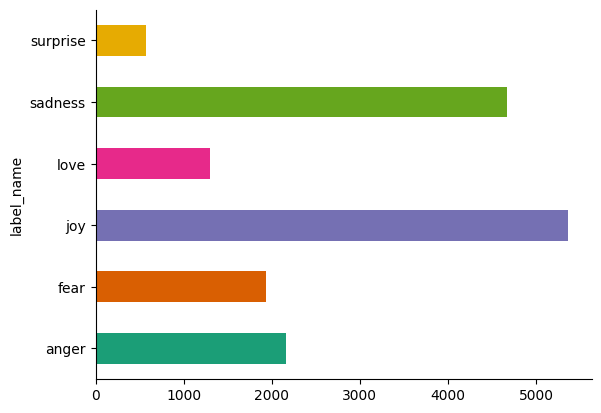

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

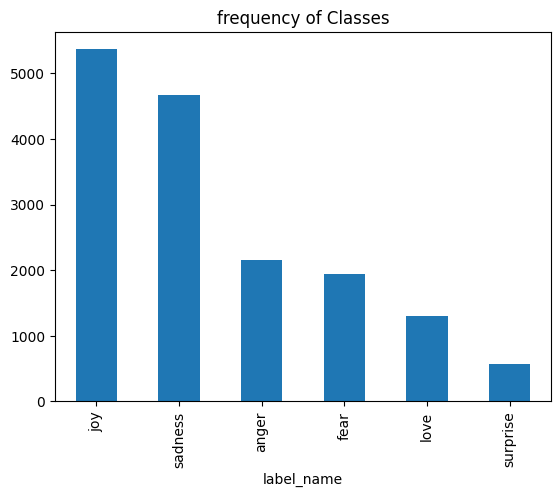

In [16]:
label_counts = df['label_name'].value_counts()
label_counts.plot.bar()
plt.title("frequency of Classes")
plt.show()

In [17]:
df.sample(5)

text  label label_name
14857  i prefer to sit in the large room at the back ...      2       love
12930  i knew something was off as i have been feelin...      0    sadness
10655  i feel so pained by a situation or circumstanc...      0    sadness
6410   im in a place right now where i feel safe and ...      1        joy
11181  im feeling so angry because that was just wast...      3      anger

In [18]:
df['no_of_words_text']=df['text'].str.split().apply(len)


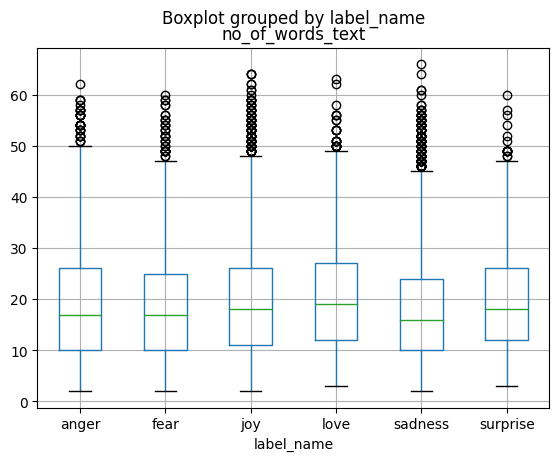

In [19]:
df.boxplot("no_of_words_text", by="label_name")
plt.show()

# Text to Tokens Conversion


*   Transformer models like DistilBERT cannot receive raw string as input: instead. Text has been tokenized and encode as numerical vectors.

*  Tokenization is the step of breaking down a string into the atomic units used in the model.

`Token encodings --> Token embeds --> Encoder stack  -->  Hidden states  --> Classification head --> predictions`



In [20]:
# Auto tokenizer
from transformers import AutoTokenizer
model_ckpt = "distilbert/distilbert-base-uncased"
model_ckpt

'distilbert/distilbert-base-uncased'

In [21]:
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
text = "I love myself. Do u love your self"
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 1045, 2293, 2870, 1012, 2079, 1057, 2293, 2115, 2969, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [22]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'i', 'love', 'myself', '.', 'do', 'u', 'love', 'your', 'self', '[SEP]']


In [23]:
tokenizer.vocab_size, tokenizer.model_max_length

(30522, 512)

In [24]:
# prompt: find maximum length of text

df['text'].str.len().max()


300

# Tokenization of the Emotion Data

In [25]:
emotion.reset_format()

In [26]:
def tokenize(batch):
  temp = tokenizer(batch["text"], padding=True, truncation=True)
  return temp
print(tokenize(emotion['train'][:]))


{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2572, 2412, 3110, 16839, 9080, 12863, 2055, 1996, 13788, 1

In [27]:
# Encoding
emotions_encoded = emotion.map(tokenize, batched=True, batch_size = None)



In [28]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

# Model Building

In [29]:
text

'I love myself. Do u love your self'

In [30]:
inputs = tokenizer(text, return_tensors='pt')
inputs

{'input_ids': tensor([[ 101, 1045, 2293, 2870, 1012, 2079, 1057, 2293, 2115, 2969,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [31]:
from transformers import AutoModel
import torch

model = AutoModel.from_pretrained(model_ckpt)

In [32]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

In [33]:
with torch.no_grad():
  outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

In [34]:
last_hidden_states.shape

torch.Size([1, 11, 768])

In [35]:
outputs

BaseModelOutput(last_hidden_state=tensor([[[-0.1847,  0.0268,  0.0115,  ..., -0.2812, -0.0079,  0.3369],
         [ 0.2373,  0.1742,  0.0118,  ..., -0.1655,  0.2156,  0.4162],
         [ 1.3397,  0.7810,  0.6908,  ..., -0.5703,  0.4514, -0.0142],
         ...,
         [-0.2550,  0.0459,  1.0754,  ..., -0.1904, -0.4641,  0.2053],
         [ 0.0180,  0.0096, -0.0638,  ..., -0.4620, -0.0702,  0.0429],
         [ 0.8335,  0.2878, -0.4280,  ..., -0.0932, -0.4864, -0.3376]]]), hidden_states=None, attentions=None)

# Fine Tuning Model

In [36]:
from transformers import AutoModelForSequenceClassification, AutoConfig
import torch

# Define the number of labels
num_labels = len(classes)

# Specify the model checkpoint
model_ckpt = "bert-base-uncased"  # Replace with your desired model checkpoint

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the configuration and modify the number of labels
config = AutoConfig.from_pretrained(model_ckpt, num_labels=num_labels)

# Load the model using the from_pretrained method
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [38]:
!pip install accelerate -U

In [39]:
from transformers import TrainingArguments

batch_size = 64
model_name = "distilbert-finetuned-emotion"

training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [44]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)

    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


In [50]:
from transformers import Trainer
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support  # Importing precision_recall_fscore_support

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)

    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=emotions_encoded['train'],
    eval_dataset=emotions_encoded['validation'],
    tokenizer=tokenizer
)

trainer.train()


TrainOutput(global_step=500, training_loss=0.09360553741455079, metrics={'train_runtime': 442.0971, 'train_samples_per_second': 72.382, 'train_steps_per_second': 1.131, 'total_flos': 1430717745024000.0, 'train_loss': 0.09360553741455079, 'epoch': 2.0})

In [51]:
preds_output = trainer.predict(emotions_encoded['test'])
preds_output.metrics

{'test_loss': 0.20109575986862183,
 'test_accuracy': 0.924,
 'test_f1': 0.9239382842888522,
 'test_precision': 0.9249105580103423,
 'test_recall': 0.924,
 'test_runtime': 6.2406,
 'test_samples_per_second': 320.481,
 'test_steps_per_second': 5.128}

In [53]:
import numpy as np
y_preds = np.argmax(preds_output.predictions, axis = 1)
y_true = emotions_encoded['test'][:]['label']

In [54]:
from sklearn.metrics import classification_report
print(classes)
print(classification_report(y_true,y_preds))

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       581
           1       0.95      0.94      0.95       695
           2       0.79      0.86      0.83       159
           3       0.94      0.90      0.92       275
           4       0.86      0.92      0.89       224
           5       0.80      0.67      0.73        66

    accuracy                           0.92      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.92      0.92      0.92      2000



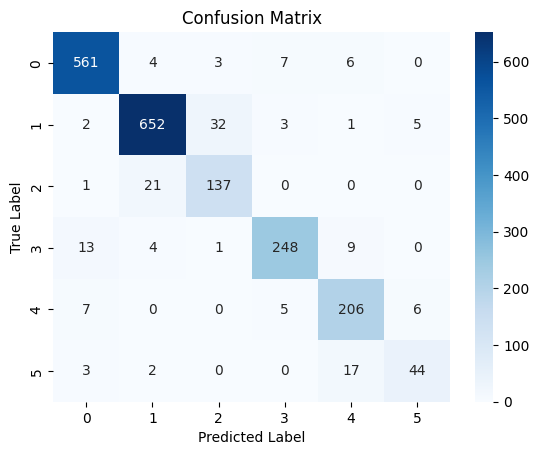

In [56]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(y_true, y_preds)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [57]:
label_counts

label_name
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [60]:
import torch
import numpy as np
from transformers import Trainer
from scipy.special import softmax
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Ensure the device is set correctly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the appropriate device
model.to(device)

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)

    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=emotions_encoded['train'],
    eval_dataset=emotions_encoded['validation'],
    tokenizer=tokenizer
)

trainer.train()



Enter a sentence: im fine but little problem
Emotion: sad, Score: 0.9980083107948303


In [65]:

# List of emotion classes
classes = ["happy", "sad", "angry", "fearful", "surprised", "disgusted"]  # Modify this list based on your specific emotion classes

def get_emotion_from_user():
    while True:
        user_input = input("Enter a sentence: ")
        if user_input == "":
            print("Please enter a sentence.")
        else:
            break
    encoded_text = tokenizer(user_input, return_tensors='pt').to(device)  # Move input tensors to the same device as the model
    output = model(**encoded_text)
    scores = output.logits[0].detach().cpu().numpy()  # Detach and move scores to CPU
    scores = softmax(scores)
    emotion = classes[np.argmax(scores)]
    print(f"Emotion: {emotion}, Score: {scores[np.argmax(scores)]}")

get_emotion_from_user()

Enter a sentence: im happy today
Emotion: sad, Score: 0.9992297887802124
